#Kaggle connection

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

# DailyChallenge

Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

Load and Inspect Data:

1. Use pandas to load the IMDB Movie Dataset.
- Inspect the data to understand its structure and contents.
2. Data Preprocessing:

- Handle missing values and convert data types as needed.
3. Rating Trends Over Years:

- Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
4. Genre Popularity Analysis:

- Generate a Seaborn bar plot to compare the number of movies across different genres.
5. Director’s Impact on Ratings:

- Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
6. Star Power Analysis:

- Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
7. Box Plot of Genres vs. Ratings:

- Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
8. Correlation Heatmap:

- Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [7]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
imdb-dataset-of-top-1000-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [69]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [70]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [73]:
df.dropna(subset=['Gross'], inplace=True)

In [74]:
df.isnull().sum()

Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [79]:
df['Gross'] = df['Gross'].apply(lambda x: int(''.join(str(x).split(','))))

[Text(0.5, 1.0, 'Rating over years')]

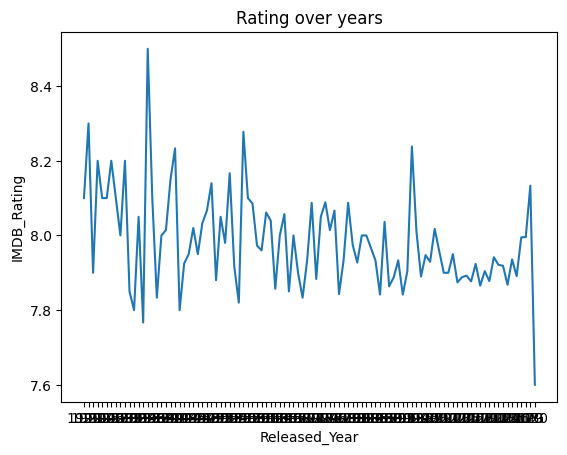

In [28]:
rate = df[['IMDB_Rating', 'Released_Year']].groupby('Released_Year').mean()
sns.lineplot(rate, x='Released_Year', y='IMDB_Rating').set(title='Rating over years')

<Axes: xlabel='Genre', ylabel='count'>

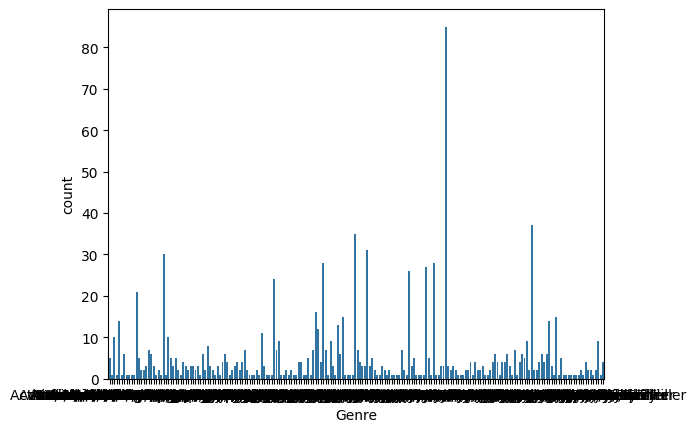

In [54]:
genre= df.groupby('Genre')['Genre'].value_counts()
sns.barplot(genre)

<Axes: xlabel='Director', ylabel='IMDB_Rating'>

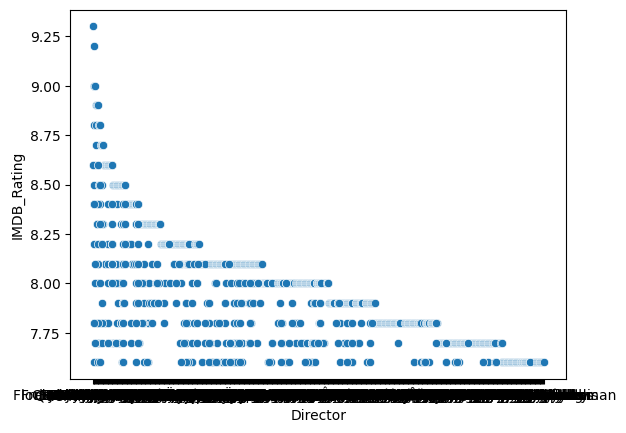

In [55]:
sns.scatterplot(df, x='Director', y='IMDB_Rating')

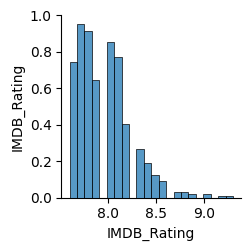

In [56]:
stars = df[['Star1', 'Star2', 'Star3', 'IMDB_Rating', 'Gross']]
sns.pairplot(stars)

<Axes: xlabel='Genre', ylabel='IMDB_Rating'>

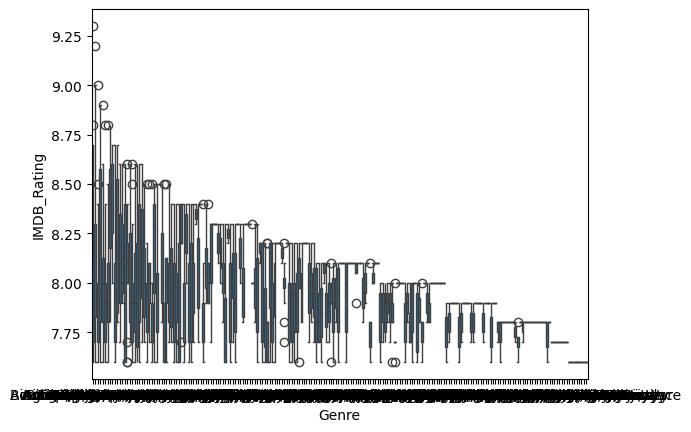

In [58]:
sns.boxplot(df, x='Genre', y='IMDB_Rating')

<Axes: >

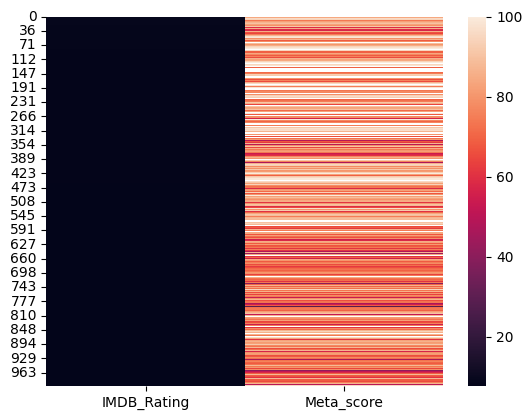

In [81]:
sns.heatmap(df[['IMDB_Rating', 'Meta_score', 'Gross']])